In [73]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt

In [44]:
header = ['UsingIP',	
'LongURL',	
'ShortURL',	
'Symbol',	
'Redirecting',
'PrefixSuffix',
'SubDomains	',
'HTTPS',
'DomainRegLen',
'Favicon',	
'NonStdPort',
'HTTPSDomainURL',	
'RequestURL',	
'AnchorURL',	
'LinksInScriptTags',	
'ServerFormHandler',	
'InfoEmail',	
'AbnormalURL',
'WebsiteForwarding',	
'StatusBarCust',	
'DisableRightClick',
'UsingPopupWindow',	
'IframeRedirection',	
'AgeOfDomain',	
'DNSRecording',	
'WebsiteTraffic',
'PageRank',
'GoogleIndex',	
'LinksPointingToPage',	
'StatsReport',
'Class']

In [45]:
data = pd.read_csv('phishing.txt', header = None)

In [46]:
data.columns = header

In [47]:
data.shape

(11055, 31)

In [48]:
data.head()

,UsingIP,LongURL,ShortURL,Symbol,Redirecting,PrefixSuffix,SubDomains\t,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeOfDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,Class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [49]:
data.describe()

,UsingIP,LongURL,ShortURL,Symbol,Redirecting,PrefixSuffix,SubDomains\t,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeOfDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,Class
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11055 non-null  int64
 1   LongURL              11055 non-null  int64
 2   ShortURL             11055 non-null  int64
 3   Symbol               11055 non-null  int64
 4   Redirecting          11055 non-null  int64
 5   PrefixSuffix         11055 non-null  int64
 6   SubDomains	          11055 non-null  int64
 7   HTTPS                11055 non-null  int64
 8   DomainRegLen         11055 non-null  int64
 9   Favicon              11055 non-null  int64
 10  NonStdPort           11055 non-null  int64
 11  HTTPSDomainURL       11055 non-null  int64
 12  RequestURL           11055 non-null  int64
 13  AnchorURL            11055 non-null  int64
 14  LinksInScriptTags    11055 non-null  int64
 15  ServerFormHandler    11055 non-null  int64
 16  InfoEmail            1

In [51]:
allColumns = data.columns
for item in allColumns:
    print(data[item].unique())

[-1  1]
[ 1  0 -1]
[ 1 -1]
[ 1 -1]
[-1  1]
[-1  1]
[-1  0  1]
[-1  1  0]
[-1  1]
[ 1 -1]
[ 1 -1]
[-1  1]
[ 1 -1]
[-1  0  1]
[ 1 -1  0]
[-1  1  0]
[-1  1]
[-1  1]
[0 1]
[ 1 -1]
[ 1 -1]
[ 1 -1]
[ 1 -1]
[-1  1]
[-1  1]
[-1  0  1]
[-1  1]
[ 1 -1]
[ 1  0 -1]
[-1  1]
[-1  1]


In [52]:
X = data.drop('Class', axis=1)
Y = data.Class

In [53]:
X.head()

,UsingIP,LongURL,ShortURL,Symbol,Redirecting,PrefixSuffix,SubDomains\t,HTTPS,DomainRegLen,Favicon,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeOfDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [54]:
Y.head()

0   -1
1   -1
2   -1
3   -1
4    1
Name: Class, dtype: int64

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [56]:
model = LogisticRegression(C=100)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [57]:
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy of model is : ', accuracy)

Accuracy of model is :  0.9297558034368405


In [58]:
confusionMatrix = confusion_matrix(Y_test, y_pred)
confusionMatrix

array([[1355,  139],
       [  94, 1729]], dtype=int64)

In [59]:
print('Count of false positive urls = ', confusionMatrix[0, 1])
print('Count of false negative urls = ', confusionMatrix[1, 0])
print('Count of misclassified samples = ', confusionMatrix[0, 1] + confusionMatrix[1, 0])

Count of false positive urls =  139
Count of false negative urls =  94
Count of misclassified samples =  233


In [61]:
X2_train = X_train[['PrefixSuffix', 'AnchorURL']]
X2_train.head()

,PrefixSuffix,AnchorURL
3840,-1,-1
5059,-1,0
5746,-1,-1
1653,-1,0
2299,1,0


In [67]:
X2_test = X_test[['PrefixSuffix', 'AnchorURL']]
X2_train.head()

,PrefixSuffix,AnchorURL
3840,-1,-1
5059,-1,0
5746,-1,-1
1653,-1,0
2299,1,0


In [68]:
model2 = LogisticRegression()
model2.fit(X2_train, Y_train)
y2_pred = model2.predict(X2_test)

In [69]:
accuracy = accuracy_score(Y_test, y2_pred)
print('Accuracy of model is : ', accuracy)

Accuracy of model is :  0.8396141091347603


In [70]:
confusionMatrix = confusion_matrix(Y_test, y2_pred)
confusionMatrix

array([[ 968,  526],
       [   6, 1817]], dtype=int64)

In [71]:
print('Count of false positive urls = ', confusionMatrix[0, 1])
print('Count of false negative urls = ', confusionMatrix[1, 0])
print('Count of misclassified samples = ', confusionMatrix[0, 1] + confusionMatrix[1, 0])

Count of false positive urls =  526
Count of false negative urls =  6
Count of misclassified samples =  532


TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

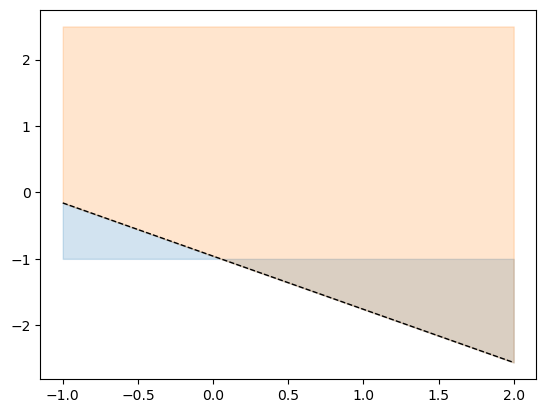

In [76]:
# Retrieve the model parameters.
b = model2.intercept_[0]
w1, w2 =  model2.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 2
ymin, ymax = -1, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*Y[Y==0].T, s=8, alpha=0.5)
plt.scatter(*Y[Y==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'phishing')
plt.xlabel(r'nonphishing')

plt.show()